
#  数据科学介绍1.5：logistic 回归

## Introduction to Data Science Part1.5: Logistic regression

### Logistics Regression

Logistics Regression这个只用来做一个分类的，2分类.
具体的说，他主要是给出一个输入下属于某个输出的概率。
比如学习10个小时，你挂科的概率。他输出的是一个概率，是一个连续的值，可以把它当作一个回归问题。
如果你在这个输出的概率上加上一个阈值，他就变成一个真正的分类问题了。
例如下面这个例子：
>exp6 下面是学习小时数和考试是否通过的一个采样数据

| Hours | 0.50 | 0.75 | 1.00 | 1.25 | 1.50 | 1.75 | 1.75 | 2.00 | 2.25 | 2.50 | 2.75 | 3.00 | 3.25 | 3.50 | 4.00 | 4.25 | 4.50 | 4.75 | 5.00 | 5.50 |
|-------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| Pass  | 0    | 0    | 0    | 0    | 0    | 0    | 1    | 0    | 1    | 0    | 1    | 0    | 1    | 0    | 1    | 1    | 1    | 1    | 1    | 1    |

试着给出个模型输入学习时间给出通过的概率

这就是一个logistic regression问题，他不是拟合一个曲线，
应该属于拟合一个二分类的概率。注意这个拟合不存在MSE这个概念也没有rsquare这个概念，
他用的是最大似然估计。意思就是，找到一个概率分布模型，这个概率分布下，
得到这一组观测数据的概率最大，如同下面这个公式要表示的意义，就是找到一组参数，
使得这个参数概率分布下得到这个观测样本的概率最大，这个在机器学习分类中用的特别多，
基本上大部分机器学习分类算法都是基于这个原理的。这是和前面完全不同的问题，但是也很简单：

$$
\hat{\theta}=argmax L_n(\theta;y)
$$


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
# 因为我们这次的数据的列向量不是特征而是样本，因此需要转置一下
# 同时如果直接读的话第一行会被认为是column name，所以需要多传一个参数header=None
# 由于第一列是str类型，数据是float，所以读进来会统一把数据格式换成object，对后续处理有一些麻烦
# 这里我们直接把数据取出来，然后转置
exp_6 = pd.read_excel('exp6.xlsx', header=None).iloc[:,1:]
exp_6 = exp_6.transpose()
exp_6


,0,1
1,0.50,0.0
2,0.75,0.0
3,1.00,0.0
4,1.25,0.0
5,1.50,0.0
6,1.75,0.0
7,1.75,1.0
8,2.00,0.0
9,2.25,1.0
10,2.50,0.0


In [12]:
from sklearn.linear_model import LogisticRegression

# 单个特征需要reshape
X = exp_6[0].values.reshape(-1, 1)
y = exp_6[1].values.reshape(-1, 1)

# 建立模型，fit，evaluate
log_model = LogisticRegression().fit(X, y)
log_model.score(X, y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8

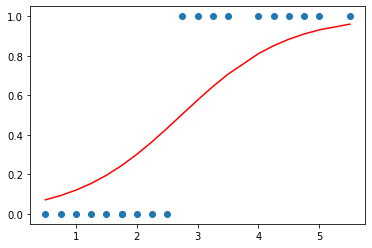

In [17]:
import numpy as np

# predict方法返回的是判断的类别
y_pred = log_model.predict(X)
# predict_proba方法返回的是判断成每一类的概率
y_prob = log_model.predict_proba(X)
# 这里我们更关心他过了的概率(1)，所以把第2列预测是1的概率取出来
# 第一列当然就是预测0的概率
plt.plot(X, y_prob[:, 1], color='red')
plt.scatter(X, y_pred)

这个图就是学习时间与考试及格概率的关系，可以看到，他的样本取值只有0，1，要么挂要么过，因为已经发生的事情。
但是拟合出来的曲线，是个连续的在0-1之间，这个是个概率。

这个例子告诉我们，不好好学习就肯定考不及格。



